In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
dir = r'./dataset/Datasets/Aposentados2021'#Insira o caminho da pasta com o dado dos aposentados
files = glob.glob(dir + "/*.csv")
df = []
cols = ['Nome','CPF','Matrícula do Servidor','Nome do órgão','Sigla do órgão','Código do órgão superior','Cargo', 'Classe', 'Padrão', 
        'Referência', 'Nível' ,'Tipo de Aposentadoria','Fundamentação da inatividade','Nome Diploma Legal',
        'Data publicação do Diploma Legal','Ocorrência de ingresso no serviço público','Data de ocorrência de ingresso no serviço público ','Rendimento_liq']
for i in range(len(files)):
    df.append(pd.read_csv(files[i], header=None, names=cols,encoding='Latin1' ,sep=';', on_bad_lines = 'skip' ))

df_ap = pd.concat(df) 
df_ap.head()

,Nome,CPF,Matrícula do Servidor,Nome do órgão,Sigla do órgão,Código do órgão superior,Cargo,Classe,Padrão,Referência,Nível,Tipo de Aposentadoria,Fundamentação da inatividade,Nome Diploma Legal,Data publicação do Diploma Legal,Ocorrência de ingresso no serviço público,Data de ocorrência de ingresso no serviço público,Rendimento_liq
0,ALVARO DE SOUZA PEREIRA ...,***905871**,130000007620,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000004/2021, SFA-MS PUB: DO 01FEV2021 ...",1022021,ADMISSAO POR CONCURSO PUBLICO ...,3011983,"44.093,69"
1,ARNALDO FERREIRA DA SILVA ...,***786031**,130000007641,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE ATIVIDADES AGROPECUARIAS,S,IV,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000003/2021, SFA-MS PUB: DO 01FEV2021 ...",1022021,ADMISSAO POR CONCURSO PUBLICO ...,24011983,"19.014,03"
2,RENE OSORIO TEIXEIRA ...,***803930**,130000014102,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000009/2021, 8DISME PUB: DO 03FEV2021 ...",3022021,ADMISSAO POR CONCURSO PUBLICO ...,12111984,"5.361,02"
3,FERNANDO PEREIRA GUIMARAES ...,***481654**,130000021351,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE INSP SANIT IND PROD ORIGEM ANI,S,IV,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000015/2021, SFA-PE PUB: DO 04FEV2021 ...",3022021,ADMISSAO SEM CONCURSO PUBLICO ...,30031983,"6.801,34"
4,IDELBRANDO VALADARES CARNEIRO ...,***480046**,130000023635,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUXILIAR DE METEOROLOGIA,S,III,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000005/2021, 5DISME PUB: DO 02FEV2021 ...",2022021,ADMISSAO SEM CONCURSO PUBLICO ...,4041983,"5.652,91"


In [3]:
dir= r'./dataset/Datasets/Abono2021'#Insira o caminho da pasta com o dado dos abonos
files = glob.glob(dir + "/*.csv")
cols = ['Nome','CPF','Descr_empr','Escolaidade','org_atuacao','UF_da_UPAG','uni._organ','UF',
'Cidade', 'Situacao', 'Anos_servico','meses_servico','Inicio_Abono','VAL']
df = []
for i in range(len(files)):
    df.append(
        pd.read_csv(files[i], encoding='Latin1',
                    sep=';', index_col=False, on_bad_lines = 'skip')
)
df_abono = pd.concat(df)
df_abono = df_abono[df_abono['Nome'] != 'Nome']
df_abono.head()


,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Situação servidor,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val
0,PAULO ELISIO DE FARIA ...,***402121**,AGENTE ADMINISTRATIVO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL GESTAO DE PESSOAS,DF,BRASILIA,ATIVO PERMANENTE,42,7,201001,"561,87"
1,MARIA VANILDA DOS SANTOS ...,***184061**,AGENTE ADMINISTRATIVO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL GESTAO DE PESSOAS,DF,BRASILIA,ATIVO PERMANENTE,42,6,200904,"552,22"
2,SONIA CANDIDA BATISTA ...,***086171**,CONTADOR,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL GESTAO DE PESSOAS,DF,BRASILIA,ATIVO EM OUTRO ORGAO,42,5,200909,"1229,69"
3,MARIA GRACI DA CONCEICAO MAXIMA ...,***803611**,AGENTE DE PORTARIA,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL GESTAO DE PESSOAS,DF,BRASILIA,ATIVO EM OUTRO ORGAO,42,2,200312,"543,33"
4,JURCINO CORDEIRO DA ROCHA ...,***886561**,AGENTE DE PORTARIA,ENSINO FUNDAMENTAL,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL GESTAO DE PESSOAS,DF,BRASILIA,ATIVO EM OUTRO ORGAO,42,2,200812,"584,52"


In [4]:
#Lendo abono de anos anteriores a 2021
cols = ['Nome','CPF','Descr_empr','Escolaidade','org_atuacao','UF_da_UPAG','uni._organ','UF',
'Cidade', 'Situacao', 'Anos_servico','meses_servico','Inicio_Abono','VAL']
anos_ab = ['2017', '2018', '2019', '2020', '2021']
df_abonos = []
for i in range(0,4):
    dir =  r'./dataset/Datasets/Abono{}'.format(anos_ab[i])
    files = glob.glob(dir + "/*.csv")
    df = []
    dfs = []
    for i in range(len(files)):
        df.append(pd.read_csv(files[i], encoding='Latin1',sep=';', index_col=False, on_bad_lines = 'skip'))
    dfs = pd.concat(df)
    dfs = dfs[dfs['Nome'] != 'Nome']
    df_abonos.append(dfs)

In [5]:
names = {
    'Nome': 'Nome',
    'CPF': 'CPF',
    'Descrição do cargo emprego': 'Descr_empr',
    'Nível de Escolaridade': 'Escolaridade',
    'Denominação do órgão de atuação': 'org_atuacao',
    'UF da UPAG de vinculação': 'UF_da_UPAG',
    'Denominação unidade organizacional': 'uni._organ',
    'UF da Residência': 'UF',
    'Cidade da residência': 'Cidade',
    'Situação servidor': 'Situacao',
    'Quantidade de anos no Serviço público': 'Anos_servico',
    'Quantidade de meses no Serviço público': 'meses_servico',
    'Ano/Mês inicial do abono de permanência': 'Inicio_Abono',
    'Val': 'VAL'
}
df_abono.rename(columns=names, inplace=True)
for i in range(len(df_abonos)):
    df_abonos[i].rename(columns=names, inplace=True)

In [6]:
#Mudando rendimento líquido dos aposentados para float
df_ap['Rendimento_liq'] = df_ap['Rendimento_liq'].str.replace('.', '', regex=False)
df_ap['Rendimento_liq'] = df_ap['Rendimento_liq'].str.replace(',', '.').astype(float)
print(df_ap['Rendimento_liq'].head())

0    44093.69
1    19014.03
2     5361.02
3     6801.34
4     5652.91
Name: Rendimento_liq, dtype: float64


In [7]:
#Armazenando o mes e ano do início do abono
dates = []
#colocando como string para separar os valores de mês e ano
for date in df_abono['Inicio_Abono']:
    dates.append(str(date))
mes = []
ano = []
#separando e armazenando como inteiro
for i in range(len(dates)):
    aux = dates[i][4]+ dates[i][5]
    mes.append(int(aux))
    aux = dates[i][0] + dates[i][1] + dates[i][2] + dates[i][3]
    ano.append(int(aux))

df_abono['Mes'] = mes
df_abono['Ano'] = ano

print(df_abono['Mes'].head())
print(df_abono['Ano'].head())


0     1
1     4
2     9
3    12
4    12
Name: Mes, dtype: int64
0    2010
1    2009
2    2009
3    2003
4    2008
Name: Ano, dtype: int64


In [8]:
#Depois, se quiser, colocar essa função pra funcionar com 2021. Deixei assim por dúvidas se iria funcionar ou não
def MesAno(df_ab):
    #Armazenando o mes e ano do início do abono
    dates = []
    #colocando como string para separar os valores de mês e ano
    for date in df_ab['Inicio_Abono']:
        dates.append(str(date))
    mes = []
    ano = []
    #separando e armazenando como inteiro
    for i in range(len(dates)):
        aux = dates[i][4]+ dates[i][5]
        mes.append(int(aux))
        aux = dates[i][0] + dates[i][1] + dates[i][2] + dates[i][3]
        ano.append(int(aux))
    return mes,ano

In [9]:
#Tomando o mes e ano, do mesmo modo feito para 2021
for i in range(len(df_abonos)):
    df_abonos[i]['Mes'], df_abonos[i]['Ano'] = MesAno(df_abonos[i])

In [10]:
df_abono['meses_servico'] = df_abono['meses_servico'].astype(int)
df_abono['Anos_servico'] = df_abono['Anos_servico'].astype(int)

print(df_abono['meses_servico'].head())
print(df_abono['Anos_servico'].head())

0    7
1    6
2    5
3    2
4    2
Name: meses_servico, dtype: int64
0    42
1    42
2    42
3    42
4    42
Name: Anos_servico, dtype: int64


In [11]:
# Mudando VAL de string para float

df_abono['VAL'] = df_abono['VAL'].str.replace(',', '.').astype(float)
print(df_abono['VAL'].head())


0     561.87
1     552.22
2    1229.69
3     543.33
4     584.52
Name: VAL, dtype: float64


In [12]:
#Fazendo o mesmo para os anos anteriores a 2021
for i in range(len(df_abonos)):
    df_abonos[i]['VAL'] = df_abonos[i]['VAL'].str.replace(',', '.').astype(float)

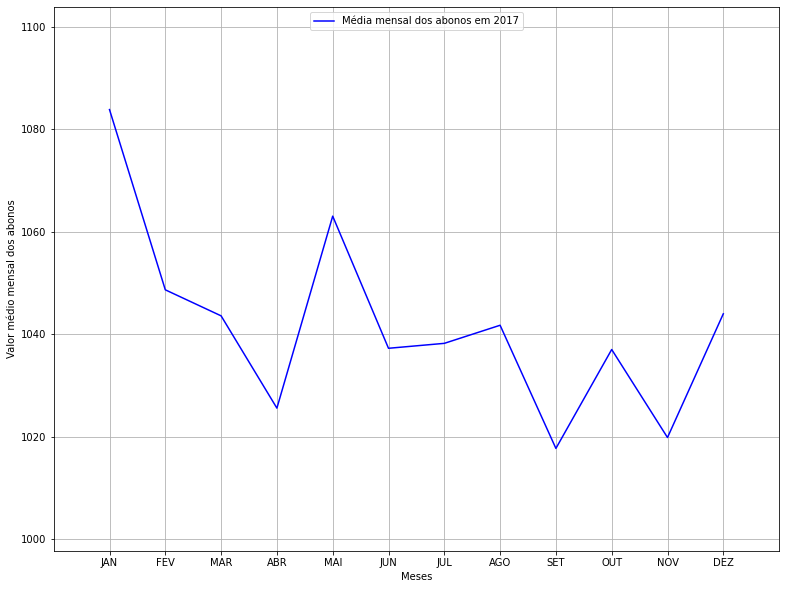

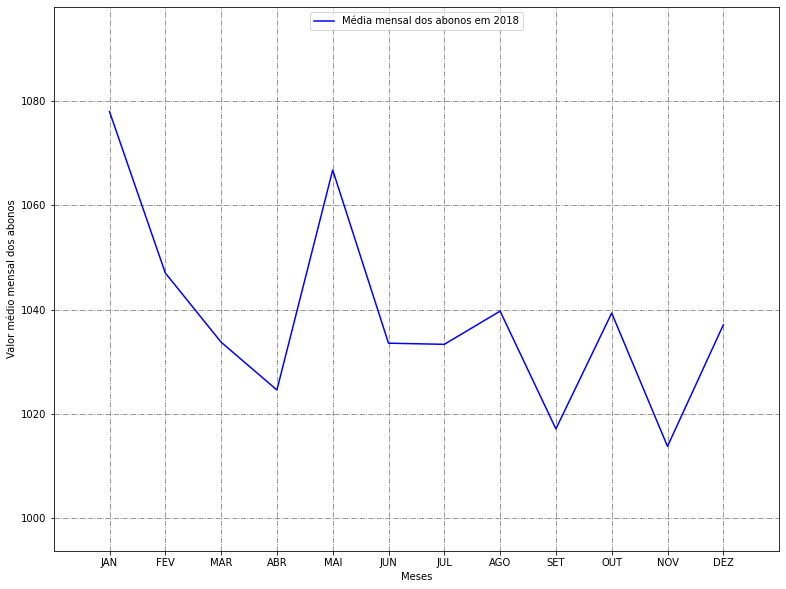

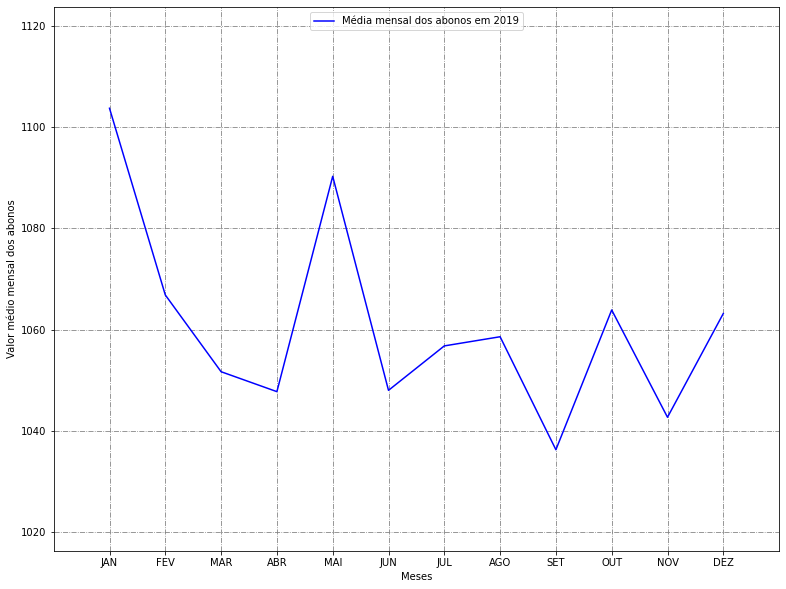

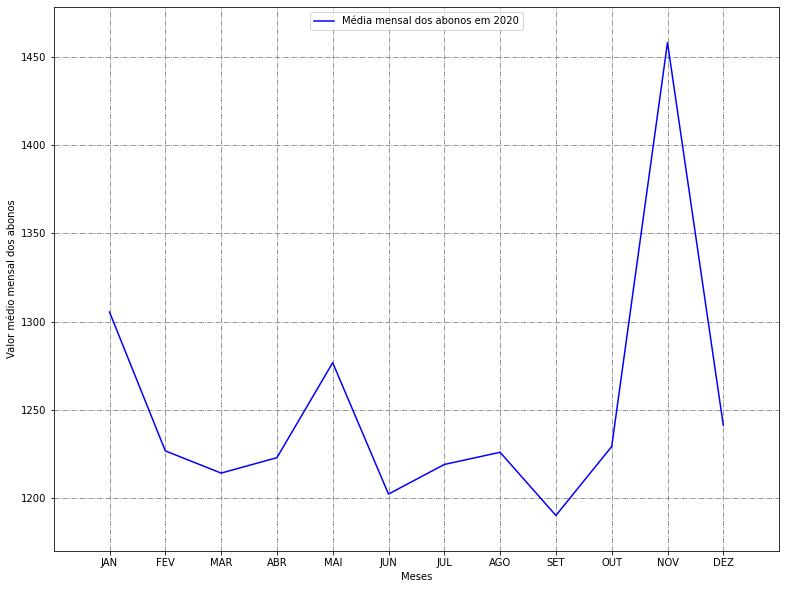

In [13]:
#Média dos anos anteriores a 2021
def media(df_ab, index):
    meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    meses_medias = list(df_ab.groupby('Mes').VAL.mean())

    fig = plt.figure(figsize=(13, 10))
    plt.plot(meses, meses_medias, color = 'blue')
    plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
    plt.xlim(-1, 12)

    plt.rc('grid', linestyle="-.", color='gray')
    plt.grid(True)

    plt.xlabel('Meses')
    plt.ylabel('Valor médio mensal dos abonos')
    plt.legend(['Média mensal dos abonos em '+anos_ab[index]], loc=9)
    plt.show()
    fig_name = 'valor médio mensal dos abonos em {}'.format(anos_ab[i])
    fig.savefig(fig_name+'.png', format='png', dpi=100)
    return meses_medias
medias = []
for i in range(len(df_abonos)):
    medias.append(media(df_abonos[i], i))
#armazenando a média mensal de cada ano

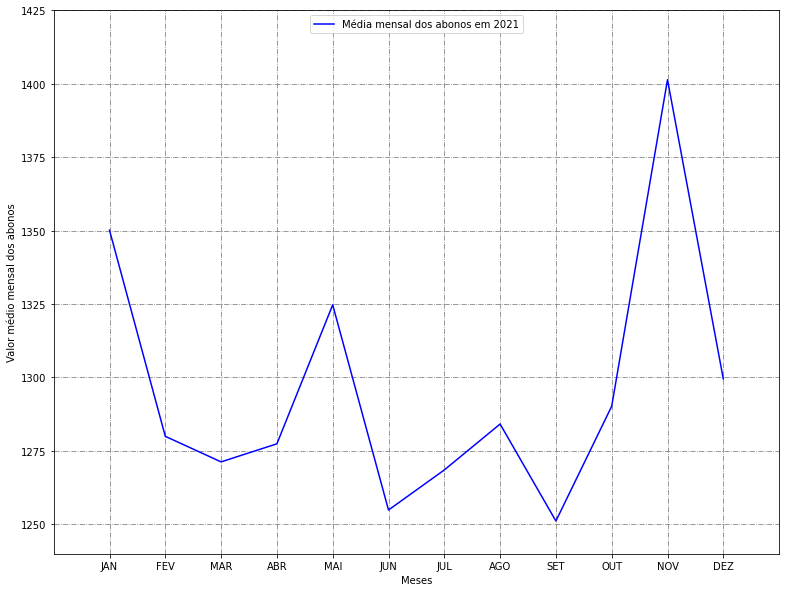

In [14]:
#Valor mensal de abonos em 2021
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
meses_medias = list(df_abono.groupby('Mes').VAL.mean())

fig = plt.figure(figsize=(13, 10))
plt.plot(meses, meses_medias, color = 'blue')
plt.ylim(1240, 1425)
plt.xlim(-1, 12)

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Valor médio mensal dos abonos')
plt.legend(['Média mensal dos abonos em 2021'], loc=9)
plt.show()

fig.savefig('valor médio mensal dos abonos em 2021.png', format='png', dpi=100)
#Colocando as medias de 2021 na lista
medias.append(meses_medias)

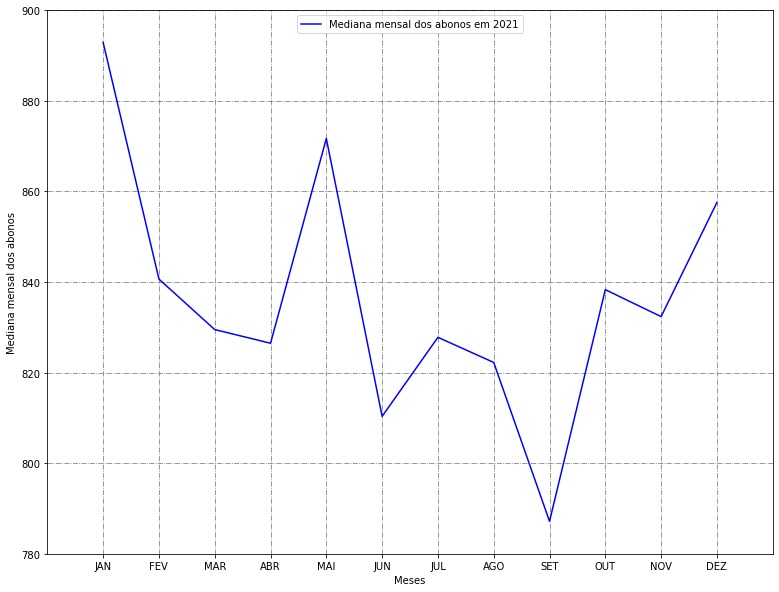

In [15]:
#Mediana mensal dos abonos em 2021
medianas = list(df_abono.groupby('Mes').VAL.median())

fig = plt.figure(figsize=(13, 10))
plt.plot(meses, medianas, color = 'blue')
plt.ylim(780,900)
plt.xlim(-1,12)

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Mediana mensal dos abonos')
plt.legend(['Mediana mensal dos abonos em 2021'], loc=9)
plt.show()

fig.savefig('Mediana mensal dos abonos em 2021.png', format='png', dpi=100)



# Aposentadoria por mês

In [16]:
df_ap.head(2)

,Nome,CPF,Matrícula do Servidor,Nome do órgão,Sigla do órgão,Código do órgão superior,Cargo,Classe,Padrão,Referência,Nível,Tipo de Aposentadoria,Fundamentação da inatividade,Nome Diploma Legal,Data publicação do Diploma Legal,Ocorrência de ingresso no serviço público,Data de ocorrência de ingresso no serviço público,Rendimento_liq
0,ALVARO DE SOUZA PEREIRA ...,***905871**,130000007620,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000004/2021, SFA-MS PUB: DO 01FEV2021 ...",1022021,ADMISSAO POR CONCURSO PUBLICO ...,3011983,44093.69
1,ARNALDO FERREIRA DA SILVA ...,***786031**,130000007641,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE ATIVIDADES AGROPECUARIAS,S,IV,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000003/2021, SFA-MS PUB: DO 01FEV2021 ...",1022021,ADMISSAO POR CONCURSO PUBLICO ...,24011983,19014.03


In [54]:
#Lendo aposentadorias de anos anteriores a 2021
cols = ['Nome','CPF','Matrícula do Servidor','Nome do órgão','Sigla do órgão','Código do órgão superior','Cargo', 'Classe', 'Padrão', 
        'Referência', 'Nível' ,'Tipo de Aposentadoria','Fundamentação da inatividade','Nome Diploma Legal',
        'Data publicação do Diploma Legal','Ocorrência de ingresso no serviço público','Data de ocorrência de ingresso no serviço público ','Rendimento_liq']
anos_ap = ['2019', '2020', '2021']
df_aposentados = []
for i in anos_ap:
    dir =  r'./dataset/Datasets/Aposentados{}'.format(i)
    files = glob.glob(dir + "/*.csv")
    df = []
    dfs = []
    for j in range(len(files)):
        df.append(pd.read_csv(files[j], encoding='Latin1',sep=';', names=cols, index_col=False, on_bad_lines = 'skip'))
    dfs = pd.concat(df)
    # dfs = dfs[dfs['Nome'] != 'Nome']
    df_aposentados.append(dfs)

['./dataset/Datasets/Aposentados2019/APOSENTADOS_122019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_042019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_092019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_082019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_032019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_102019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_052019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_112019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_012019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_072019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_062019.csv', './dataset/Datasets/Aposentados2019/APOSENTADOS_022019.csv']
['./dataset/Datasets/Aposentados2020/APOSENTADOS_112020.csv', './dataset/Datasets/Aposentados2020/APOSENTADOS_072020.csv', './dataset/Datasets/Aposentados2020/APOSENTADOS_102020.csv', './dataset/Datasets/Aposentados2020/APOSENTADOS_022020.csv', './dataset/Datasets/Ap

In [55]:
def MesAnoAposentadoria(df_aps):
    #Armazenando o mes e ano do início do abono
    dates = []
    #colocando como string para separar os valores de mês e ano
    for date in df_aps['Data publicação do Diploma Legal']:
        dates.append(str(date))
    mes = []
    ano = []
    #separando e armazenando como inteiro
    for i in range(len(dates)):
        aux = dates[i][-6:-4]
        mes.append(int(aux))
        aux = dates[i][-4:]
        ano.append(int(aux))
    return mes,ano
  

In [56]:
for i in range(len(df_aposentados)):
    df_aposentados[i]['Mes'], df_aposentados[i]['Ano'] = MesAnoAposentadoria(df_aposentados[i])

In [57]:
def rendimento_liq_para_float(df_apos):
  df_apos['Rendimento_liq'] = df_apos['Rendimento_liq'].str.replace('.', '', regex=False)
  df_apos['Rendimento_liq'] = df_apos['Rendimento_liq'].str.replace(',', '.').astype(float)

In [58]:
for i in range(len(df_aposentados)):
  rendimento_liq_para_float(df_aposentados[i])

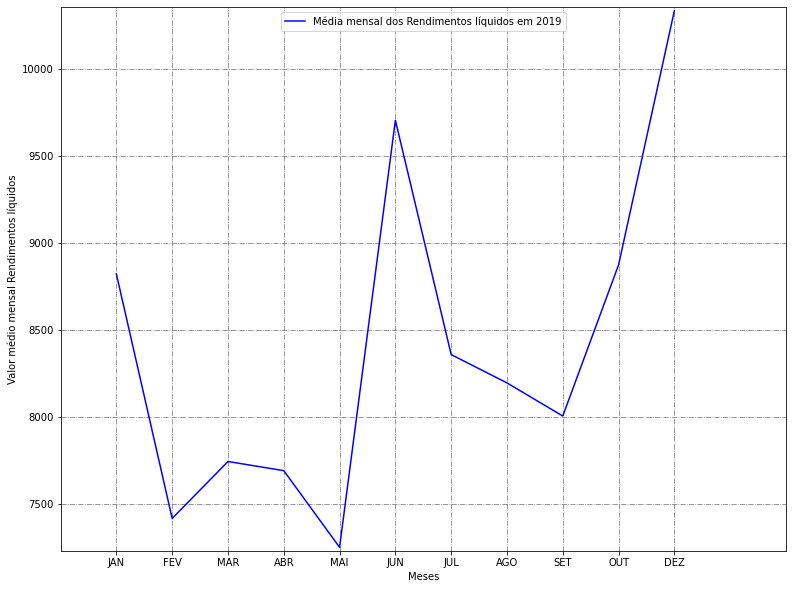

/tmp/ipykernel_4407/2167453917.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formAPOSENTADOS_092019at" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)


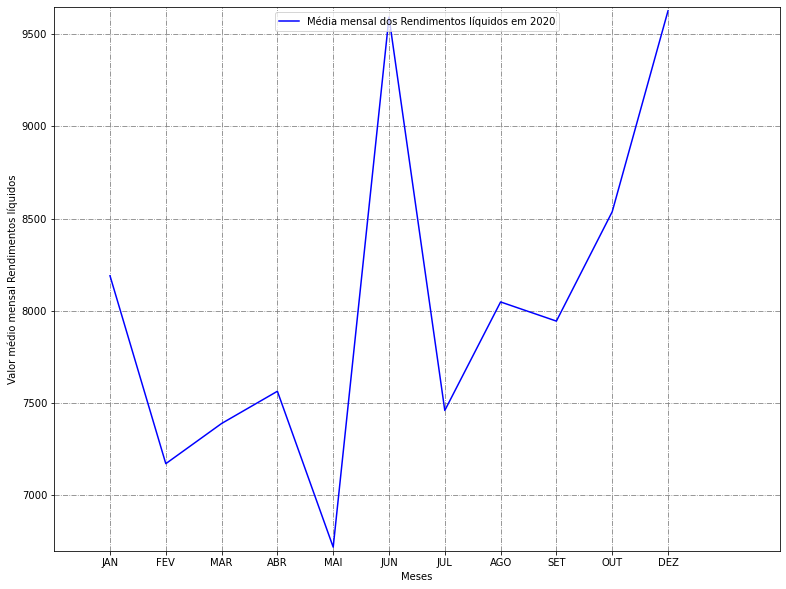

/tmp/ipykernel_4407/2167453917.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formAPOSENTADOS_092019at" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)


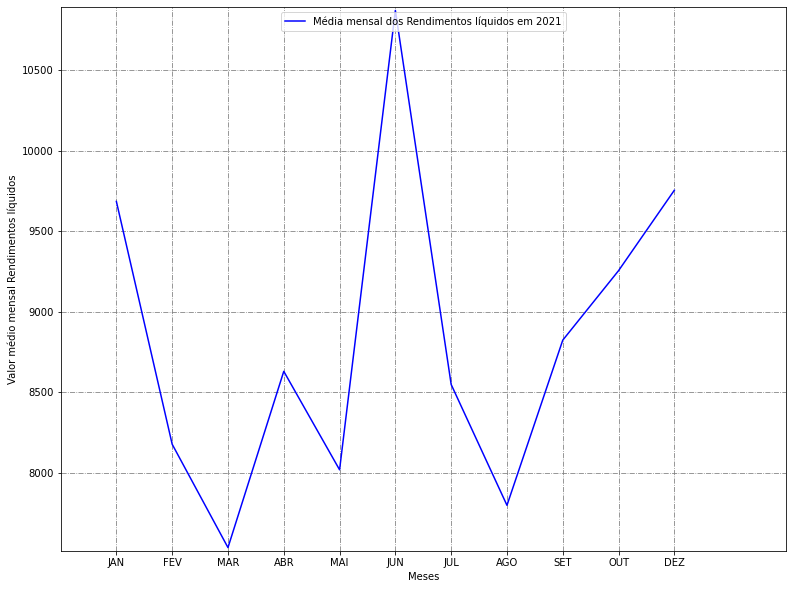

/tmp/ipykernel_4407/2167453917.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formAPOSENTADOS_092019at" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)


In [62]:
#Média dos anos anteriores a 2021 - APOSENTADOS
def mediaAposentados(df_apos, index):
    meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'DEZ']
    meses_medias = list(df_apos.groupby('Mes').Rendimento_liq.mean())

    fig = plt.figure(figsize=(13, 10))
    plt.plot(meses, meses_medias, color = 'blue')
    plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
    plt.xlim(-1, 12)

    plt.rc('grid', linestyle="-.", color='gray')
    plt.grid(True)

    plt.xlabel('Meses')
    plt.ylabel('Valor médio mensal Rendimentos líquidos')
    plt.legend(['Média mensal dos Rendimentos líquidos em '+anos_ap[index]], loc=9)
    plt.show()
    fig_name = 'valor médio mensal dos Rendimentos líquidos em {}'.format(anos_ap[i])
    fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)
    return meses_medias
mediasAposentados = []
for i in range(len(df_aposentados)):
    mediasAposentados.append(mediaAposentados(df_aposentados[i], i))

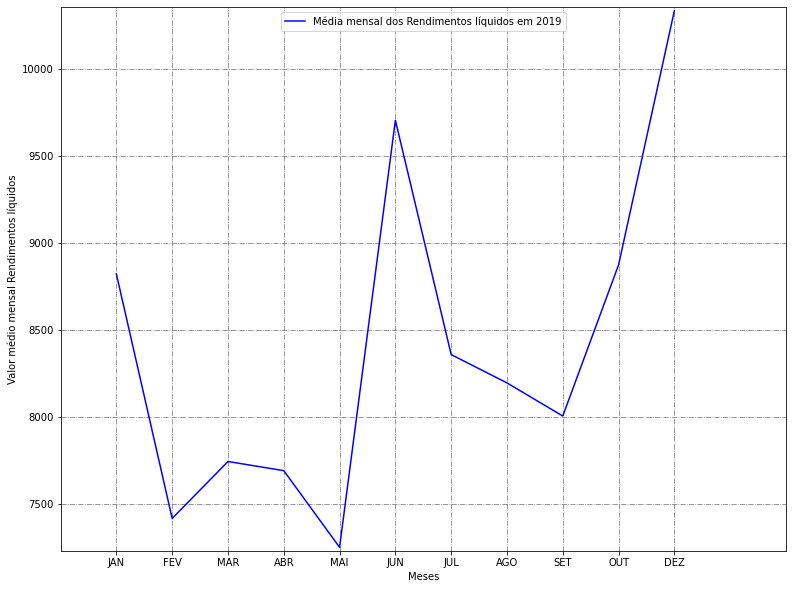

/tmp/ipykernel_4407/2167453917.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formAPOSENTADOS_092019at" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)


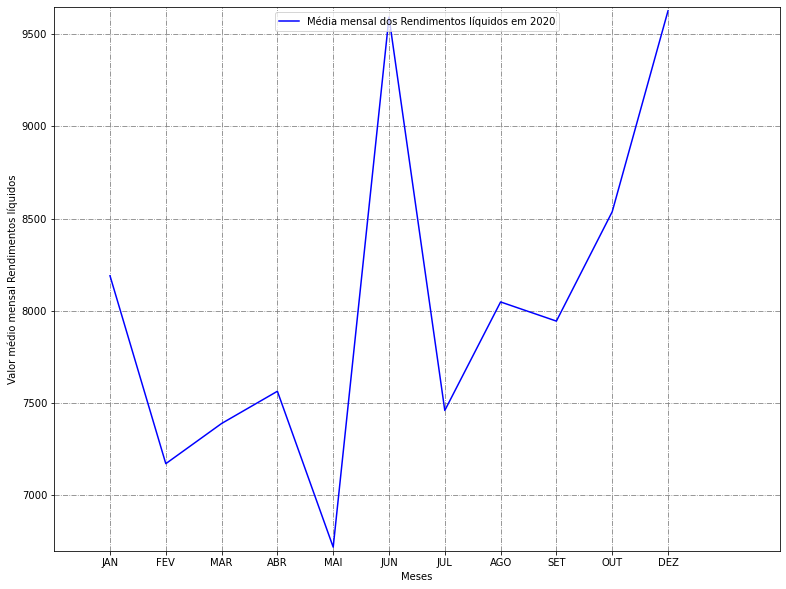

/tmp/ipykernel_4407/2167453917.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formAPOSENTADOS_092019at" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)


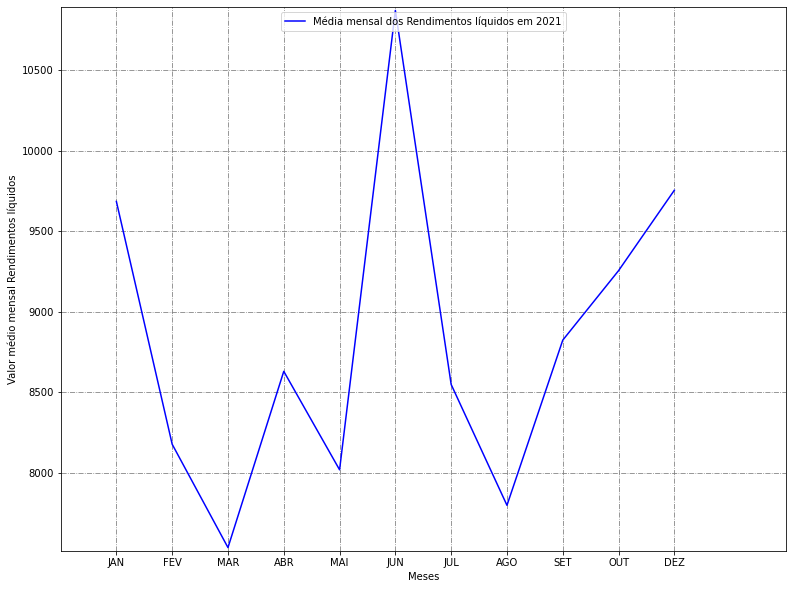

/tmp/ipykernel_4407/2167453917.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "formAPOSENTADOS_092019at" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(fig_name+'.png', formAPOSENTADOS_092019at='png', dpi=100)


In [63]:
def medianaAposentadorias(df_aps, index):
  meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'DEZ']
  medianas = list(df_aps.groupby('Mes').Rendimento_liq.median())

  fig = plt.figure(figsize=(13, 10))
  plt.plot(meses, medianas, color = 'blue')
  plt.ylim(780,900)
  plt.xlim(-1,12)

  plt.rc('grid', linestyle="-.", color='gray')
  plt.grid(True)

  plt.xlabel('Meses')
  plt.ylabel('Mediana mensal dos Rendimentos líquidos das aposentadorias')
  plt.legend([f'Mediana mensal dos Rendimentos líquidos das aposentadorias em {anos_ap[index]}'], loc=9)
  plt.show()

  fig.savefig(f'Mediana mensal dos rendimentos líquidos em {anos_ap[index]}.png', format='png', dpi=100)

medianasAposentadorias = []
for i in range(len(df_aposentados)):
    medianasAposentadorias.append(mediaAposentados(df_aposentados[i], i))

### Aposentadoria de acordo com cargo

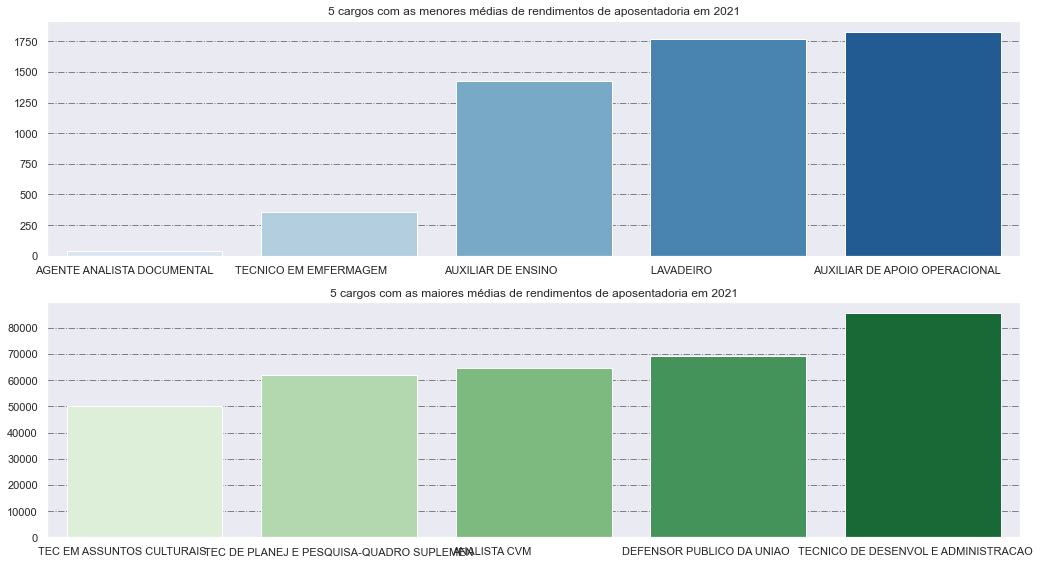

In [118]:
#Redimentos aposentadoria de acordo com o cargo
redimentos = pd.DataFrame(df_ap.groupby('Cargo').Rendimento_liq.mean().sort_values())
redimentos = redimentos.reset_index()

menores_rend = redimentos.iloc[0:5]
maiores_rend = redimentos.tail(5)

fig, ax = plt.subplots(2, figsize=(15,8))

x1 = list(menores_rend['Cargo'])
y1 = list(menores_rend['Rendimento_liq'])

sns.barplot(ax=ax[0], x=x1, y=y1, palette="Blues")
ax[0].set_title("5 cargos com as menores médias de rendimentos de aposentadoria em 2021")

x2 = list(maiores_rend['Cargo'])
y2 = list(maiores_rend['Rendimento_liq'])
sns.barplot(ax=ax[1], x=x2, y=y2, palette="Greens")
ax[1].set_title("5 cargos com as maiores médias de rendimentos de aposentadoria em 2021")

fig.tight_layout()
plt.savefig('Médias de rendimento por cargo')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


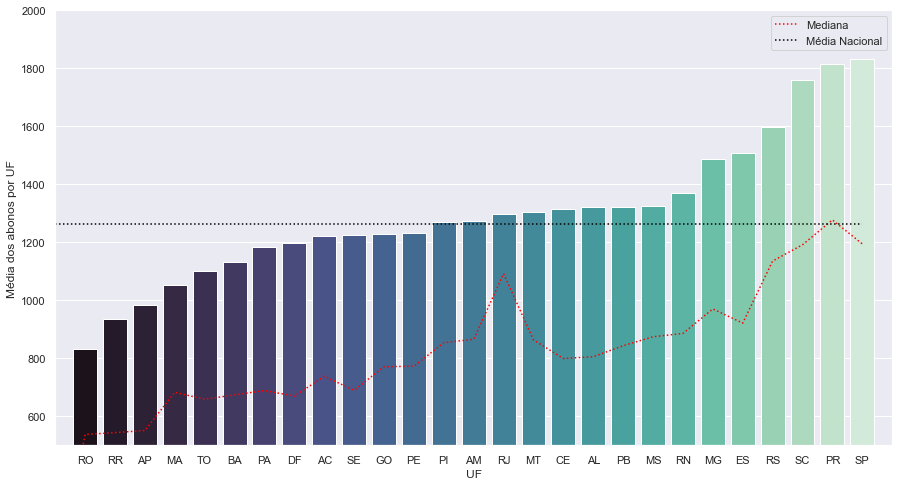

In [119]:
#Média e mediana de abonos por UF 

#Definindo a media e mediana
uf_m = pd.DataFrame(df_abono.groupby('UF').VAL.mean().sort_values())
uf_m['mediana'] = df_abono.groupby('UF').VAL.median().sort_values() 
uf_m['media'] = uf_m['VAL']
uf_m.reset_index(inplace=True)

uf_m.drop('VAL', axis=1 ,inplace=True)
uf_m.sort_values('UF')

media_nacional = uf_m['media'].mean()

#Definindo os eixos do gráfico
x_uf = list(uf_m['UF'])
y_mediana = list(uf_m['mediana'])
y_media = list(uf_m['media'])

#Construindo o gráfico
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(15,8))
sns.barplot(x_uf, y_media, palette="mako")
sns.lineplot(x=x_uf, y=y_mediana, linestyle=":",color="red", label='Mediana')
sns.lineplot(x=x_uf, y=media_nacional, linestyle=":",color="black", label='Média Nacional')
plt.ylim(500,2000)
plt.xlim(0, 28)
plt.xlabel('UF')
plt.ylabel('Média dos abonos por UF')
plt.show()

fig.tight_layout()
fig.savefig('Valor médio mensal dos abonos por estado.png', format='png',dpi=100)

In [120]:

# Transformando as cidades em categorias numéricas
df_abono['Descr_empr'] = df_abono['Descr_empr'].astype('category')
df_abono['Descr_empr'] = df_abono['Descr_empr'].cat.codes
df_abono['Descr_empr'] = df_abono['Descr_empr'].astype('float64')

df_abono['Escolaridade'] = df_abono['Escolaridade'].astype('category')
df_abono['Escolaridade'] = df_abono['Escolaridade'].cat.codes
df_abono['Escolaridade'] = df_abono['Escolaridade'].astype('float64')

df_abono['org_atuacao'] = df_abono['org_atuacao'].astype('category')
df_abono['org_atuacao'] = df_abono['org_atuacao'].cat.codes
df_abono['org_atuacao'] = df_abono['org_atuacao'].astype('float64')
for i in range(len(df_abonos)):
    df_abonos[i]['org_atuacao'] = df_abonos[i]['org_atuacao'].astype('category')
    df_abonos[i]['org_atuacao'] = df_abonos[i]['org_atuacao'].cat.codes
    df_abonos[i]['org_atuacao'] = df_abonos[i]['org_atuacao'].astype('float64')


df_abono['UF_da_UPAG'] = df_abono['UF_da_UPAG'].astype('category')
df_abono['UF_da_UPAG'] = df_abono['UF_da_UPAG'].cat.codes
df_abono['UF_da_UPAG'] = df_abono['UF_da_UPAG'].astype('float64')

df_abono['uni._organ'] = df_abono['uni._organ'].astype('category')
df_abono['uni._organ'] = df_abono['uni._organ'].cat.codes
df_abono['uni._organ'] = df_abono['uni._organ'].astype('float64')

# df_abono['UF'] = df_abono['UF'].astype('category')
# df_abono['UF'] = df_abono['UF'].cat.codes
# df_abono['UF'] = df_abono['UF'].astype('float64')

df_abono['Cidade'] = df_abono['Cidade'].astype('category')
df_abono['Cidade'] = df_abono['Cidade'].cat.codes
df_abono['Cidade'] = df_abono['Cidade'].astype('float64')

df_abono['Situacao'] = df_abono['Situacao'].astype('category')
df_abono['Situacao'] = df_abono['Situacao'].cat.codes
df_abono['Situacao'] = df_abono['Situacao'].astype('float64')

df_abono.head()

,Nome,CPF,Descr_empr,Escolaridade,org_atuacao,UF_da_UPAG,uni._organ,UF,Cidade,Situacao,Anos_servico,meses_servico,Inicio_Abono,VAL,Mes,Ano
0,PAULO ELISIO DE FARIA ...,***402121**,14.0,6.0,118.0,6.0,88.0,DF,300.0,4.0,42,7,201001,561.87,1,2010
1,MARIA VANILDA DOS SANTOS ...,***184061**,14.0,5.0,118.0,6.0,88.0,DF,300.0,4.0,42,6,200904,552.22,4,2009
2,SONIA CANDIDA BATISTA ...,***086171**,350.0,6.0,118.0,6.0,88.0,DF,300.0,3.0,42,5,200909,1229.69,9,2009
3,MARIA GRACI DA CONCEICAO MAXIMA ...,***803611**,47.0,5.0,118.0,6.0,88.0,DF,300.0,3.0,42,2,200312,543.33,12,2003
4,JURCINO CORDEIRO DA ROCHA ...,***886561**,47.0,3.0,118.0,6.0,88.0,DF,300.0,3.0,42,2,200812,584.52,12,2008


In [136]:
#Funcao para retirar a media de abono por órgão em cada ano analisado
def media_orgaos(df_ab,index):
    
    org_m = pd.DataFrame(df_ab.groupby('org_atuacao').VAL.mean().sort_values()) 
    org_m['media'] = org_m['VAL']
    org_m.reset_index(inplace=True)

    org_m.drop('VAL', axis=1 ,inplace=True)
    org_m.sort_values('org_atuacao')
    
    #Definindo os eixos do gráfico
    x_org = list(org_m['org_atuacao'])
    y_media_org = list(org_m['media'])

    #Construindo o gráfico
    sns.set_theme(style="darkgrid")
    fig = plt.figure(figsize=(15,8))
    sns.lineplot(x_org, y_media_org, palette="mako")
    plt.xlim(0, 185)
    plt.ylim(min(y_media_org)-20, max(y_media_org)+300)
    plt.xlabel('Órgão')
    plt.ylabel('Média dos abonos por órgão')
    plt.legend(['Média dos abonos por órgão em '+anos_ab[index]], loc=9)
    plt.show()
    
    fig_name = 'valor médio dos abonos por órgão em {}'.format(anos_ab[index])
    fig.tight_layout()
    fig.savefig(fig_name+'.png', format='png', dpi=100)
    media_anual = org_m['media'].mean()
    return media_anual

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


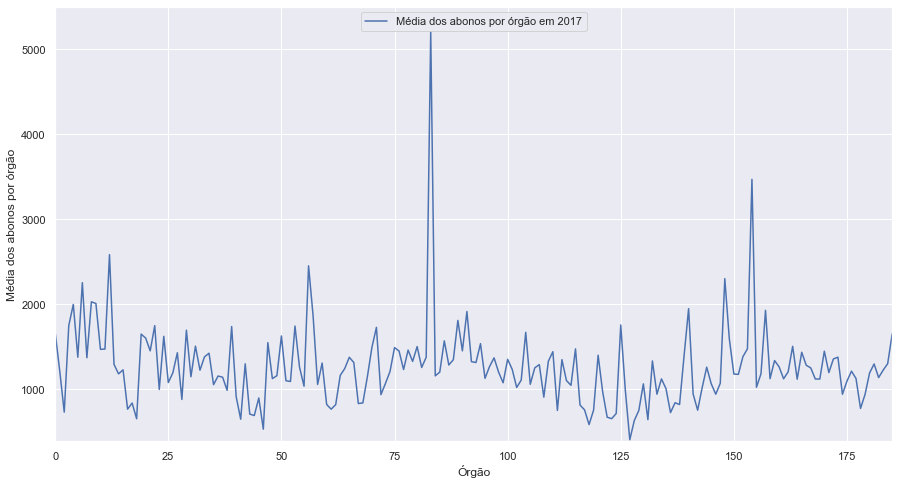

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


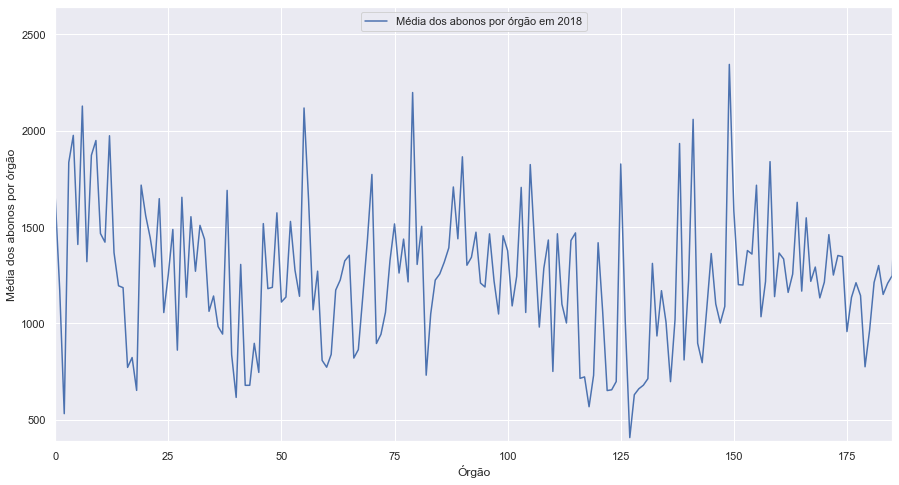

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


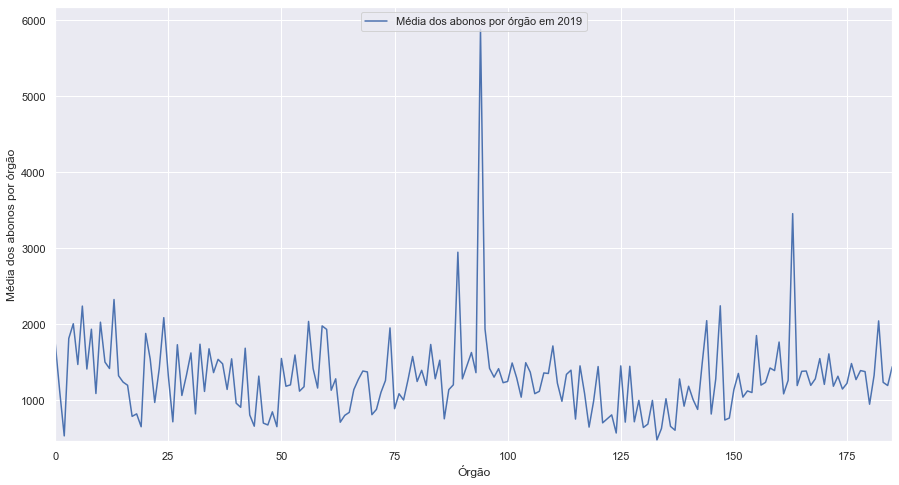

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


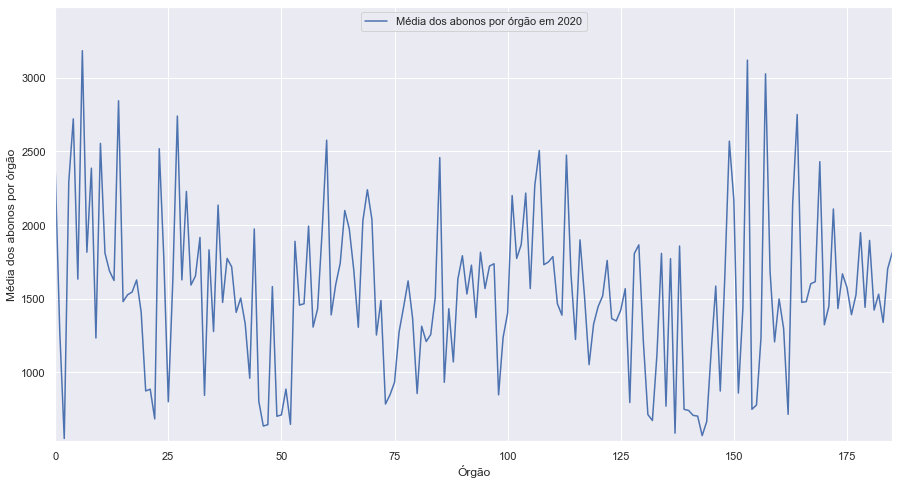

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


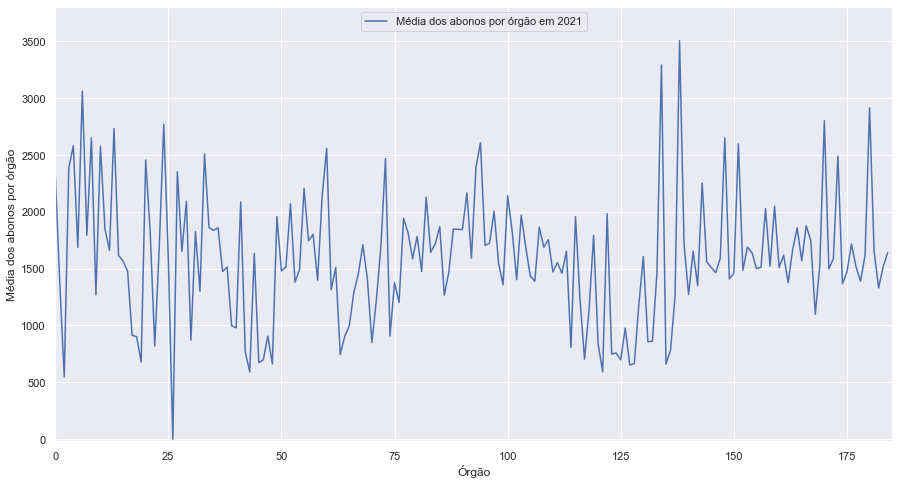

In [137]:
#tirando as médias de cada órgão em cada ano
media_orgs = []
for i in range(len(df_abonos)):
    media_orgs.append(media_orgaos(df_abonos[i],i))
media_orgs.append(media_orgaos(df_abono,4))
#Incluindo o ano de 2021 na lista de medias de cada órgão

In [ ]:
# Criacao do dicionario para abono
df_abono_objects = df_abono.select_dtypes(include='object')
df_abono_dicionario = {}
for col in df_abono_objects:
    df_abono_dicionario[col] = df_abono_objects[col].unique().tolist()

for i in df_abono_dicionario:
    df_abono_dicionario[i]=list(map(str.strip, df_abono_dicionario[i]))


In [ ]:
df_abono_dicionario

{'Nome': ['PAULO ELISIO DE FARIA',
  'MARIA VANILDA DOS SANTOS',
  'SONIA CANDIDA BATISTA',
  'MARIA GRACI DA CONCEICAO MAXIMA',
  'JURCINO CORDEIRO DA ROCHA',
  'MARIA ZULENE GOMES NASCIMENTO',
  'ALDA MARIA ROCHA LOPES',
  'DOMINGOS SAVIO RODRIGUES',
  'DEUSDEDIT GUIMARAES ROCHA FILHO',
  'SIDNEY SILVA BRASIL',
  'CLEUSA ADELAIDE MOREIRA MARINO',
  'WALTER DOURADO DE OLIVEIRA',
  'BERONETE BARROS DE FREITAS ARAUJO',
  'GARDENIA MARIA MONTEIRO DE BRITO SANTOS',
  'RUSBERTO DO VALE OLIVEIRA',
  'JOSE CARLOS FONSECA BOQUADI',
  'NESTOR BATISTA DE OLIVEIRA',
  'OLIVIA SANTINON HOLLENBACH',
  'JOAO BATISTA JUSTINO',
  'LUIZ CARLOS GERALDO',
  'EDVALDO NOGUEIRA DE ALMEIDA',
  'SEVERINO DOS RAMOS SILVA',
  'BARTOLOMEU ALVES BARBOSA',
  'ALEIDE MARIA SOUSA ROCHA',
  'JOSEFA MARIA DE ARAUJO',
  'JOSE PAULO MARCELINO',
  'CARLOS ANTONIO DA CONCEICAO',
  'MARIA DE FATIMA DOS SANTOS',
  'HILDEBRANDO RAMOS COMEDIO',
  'ADEILSON ALVES DE OLIVEIRA',
  'HELIO NASCIMENTO MEDEIROS',
  'EDUARDO PENHAFO

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
group_df_abono = df_abono.groupby('UF')
by_uf_df_abono = [group_df_abono.get_group(x) for x in group_df_abono.groups]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


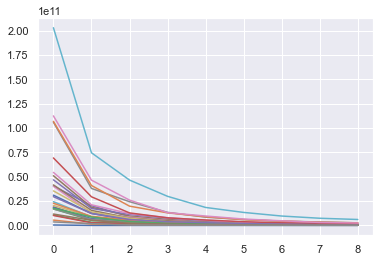

In [ ]:
to_use_cols = ['Escolaridade','Anos_servico','meses_servico','Mes', 'Ano','VAL']

inertia_values = [[] for _ in by_uf_df_abono]

for i in range(1, 10):
    model = KMeans(i)
    for i, df in enumerate(by_uf_df_abono):
        model.fit(df[to_use_cols])
    
        inertia_values[i].append(model.inertia_)

x_axis = [x for x in range(len(inertia_values[0]))]
for inertia in inertia_values:
    plt.plot(x_axis, inertia)

plt.show()

In [ ]:
MAX_CLUSTERS = 3

models = [KMeans(MAX_CLUSTERS).fit(df[to_use_cols]) for df in by_uf_df_abono]

In [ ]:
centroids = [model.cluster_centers_ for model in models]

classified_columns = ['Escolaridade']

centroids_df = [pd.DataFrame() for _ in centroids]

for index, centroid_df in enumerate(centroids_df):
    for i, column in enumerate(to_use_cols):
        column_of_centroids = []
        for j in range(MAX_CLUSTERS):
            column_of_centroids.append(centroids[index][j][i])
        
        if column in classified_columns:
            values = []
            for val in column_of_centroids:
                try:
                    # print(val)
                    values.append(df_abono_dicionario[column][round(val)])
                except:
                    values.append(val)
            centroid_df[column] = values
        else:      
            centroid_df[column] = column_of_centroids

order_of_uf = [df['UF'].unique()[0] for df in by_uf_df_abono]


for uf, centroid_df in zip(order_of_uf[1:], centroids_df[1:]):
    print(uf)
    # print(f'{centroid_df["UF"]}')
    print(centroid_df.head(10).T)
# print(centroids_df[0].head().T)
        

AC
                                     0                    1  \
Escolaridade   SEGUNDO GRAU INCOMPLETO  SUPERIOR INCOMPLETO   
Anos_servico                 38.435611            33.955307   
meses_servico                 5.481077             5.553073   
Mes                           6.490221             6.385475   
Ano                        2013.977648          2014.072626   
VAL                         736.466734          4474.539162   

                                 2  
Escolaridade   SUPERIOR INCOMPLETO  
Anos_servico              33.41041  
meses_servico             5.409409  
Mes                       6.462462  
Ano                    2014.267267  
VAL                    2547.504074  
AL
                                     0                    1  \
Escolaridade   SEGUNDO GRAU INCOMPLETO  SUPERIOR INCOMPLETO   
Anos_servico                 37.325505            35.796516   
meses_servico                 5.549952             5.477435   
Mes                           6.353994   